<a href="https://colab.research.google.com/github/Arijitde24/Machine-learning/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/DATASETS/covid_19_clean_complete.csv',parse_dates=['Date']).set_index('Date')

In [ ]:
covid

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean
2020-01-22,NaN,Albania,41.153300,20.168300,0,0,0,0,Europe
2020-01-22,NaN,Algeria,28.033900,1.659600,0,0,0,0,Africa
2020-01-22,NaN,Andorra,42.506300,1.521800,0,0,0,0,Europe
2020-01-22,NaN,Angola,-11.202700,17.873900,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
2020-07-27,NaN,Sao Tome and Principe,0.186400,6.613100,865,14,734,117,Africa
2020-07-27,NaN,Yemen,15.552727,48.516388,1691,483,833,375,Eastern Mediterranean
2020-07-27,NaN,Comoros,-11.645500,43.333300,354,7,328,19,Africa


In [ ]:
covid.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
covid.drop('Province/State', axis=1, inplace=True)

In [ ]:
covid.duplicated().sum()

np.int64(23104)

In [ ]:
covid.drop_duplicates(inplace=True)

In [ ]:
covid.isnull().sum()

,0
Country/Region,0
Lat,0
Long,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
covid.duplicated().sum()

np.int64(0)

In [ ]:
covid

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,
2020-01-22,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean
2020-01-22,Albania,41.153300,20.168300,0,0,0,0,Europe
2020-01-22,Algeria,28.033900,1.659600,0,0,0,0,Africa
2020-01-22,Andorra,42.506300,1.521800,0,0,0,0,Europe
2020-01-22,Angola,-11.202700,17.873900,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...
2020-07-27,Malawi,-13.254300,34.301500,3664,99,1645,1920,Africa
2020-07-27,South Sudan,6.877000,31.307000,2305,46,1175,1084,Africa
2020-07-27,Sao Tome and Principe,0.186400,6.613100,865,14,734,117,Africa


In [ ]:
def change_with_date(columns):
    if columns in ['Confirmed','Deaths','Recovered']:
        series = covid.groupby('Date')[columns].sum()
        title = f"{columns} Cases Over Time"
        fig = px.line(x=series.index,
                      y=series.values,
                      labels={
                          'x':'DATE',
                          'y':columns
                      },
                      title=title)
        fig.show()
    else:
        print('Columns should be "Confirmed", "Deaths" or Recovered')

In [ ]:
change_with_date('Confirmed')

In [ ]:
change_with_date('Deaths')

In [ ]:
change_with_date('Recovered')

In [ ]:
def seasonal_plot(column, period=30):

    if column not in ['Confirmed', 'Deaths', 'Recovered']:
        print('Column should be "Confirmed", "Deaths", or "Recovered"')
        return

    # Ensure no missing values (ADF & decomposition require complete data)
    series = covid[column].dropna()

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(series, model='additive', period=period)

    # Plot and resize
    fig = decomposition.plot()
    fig.set_size_inches(30, 10)
    plt.show()

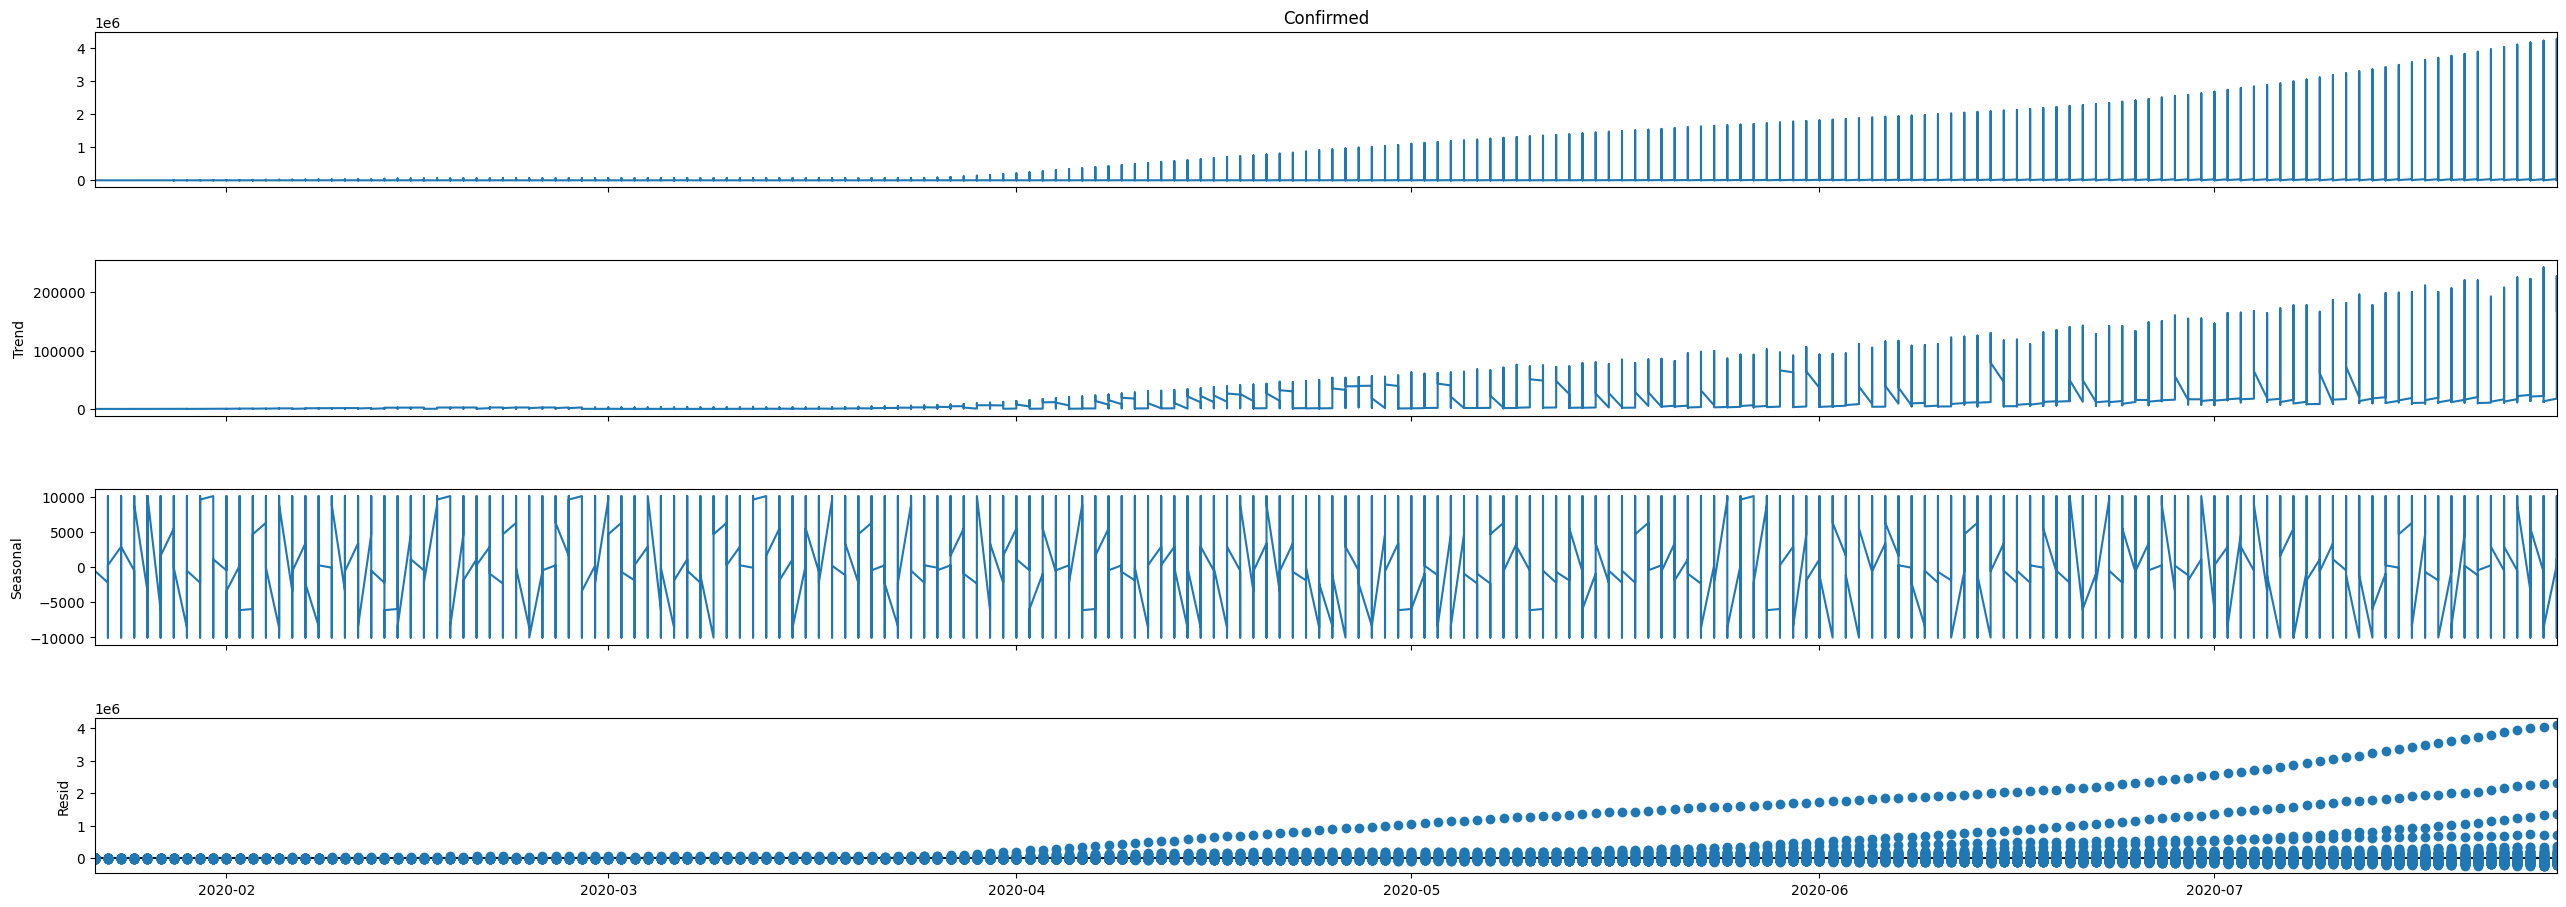

In [ ]:
seasonal_plot('Confirmed')

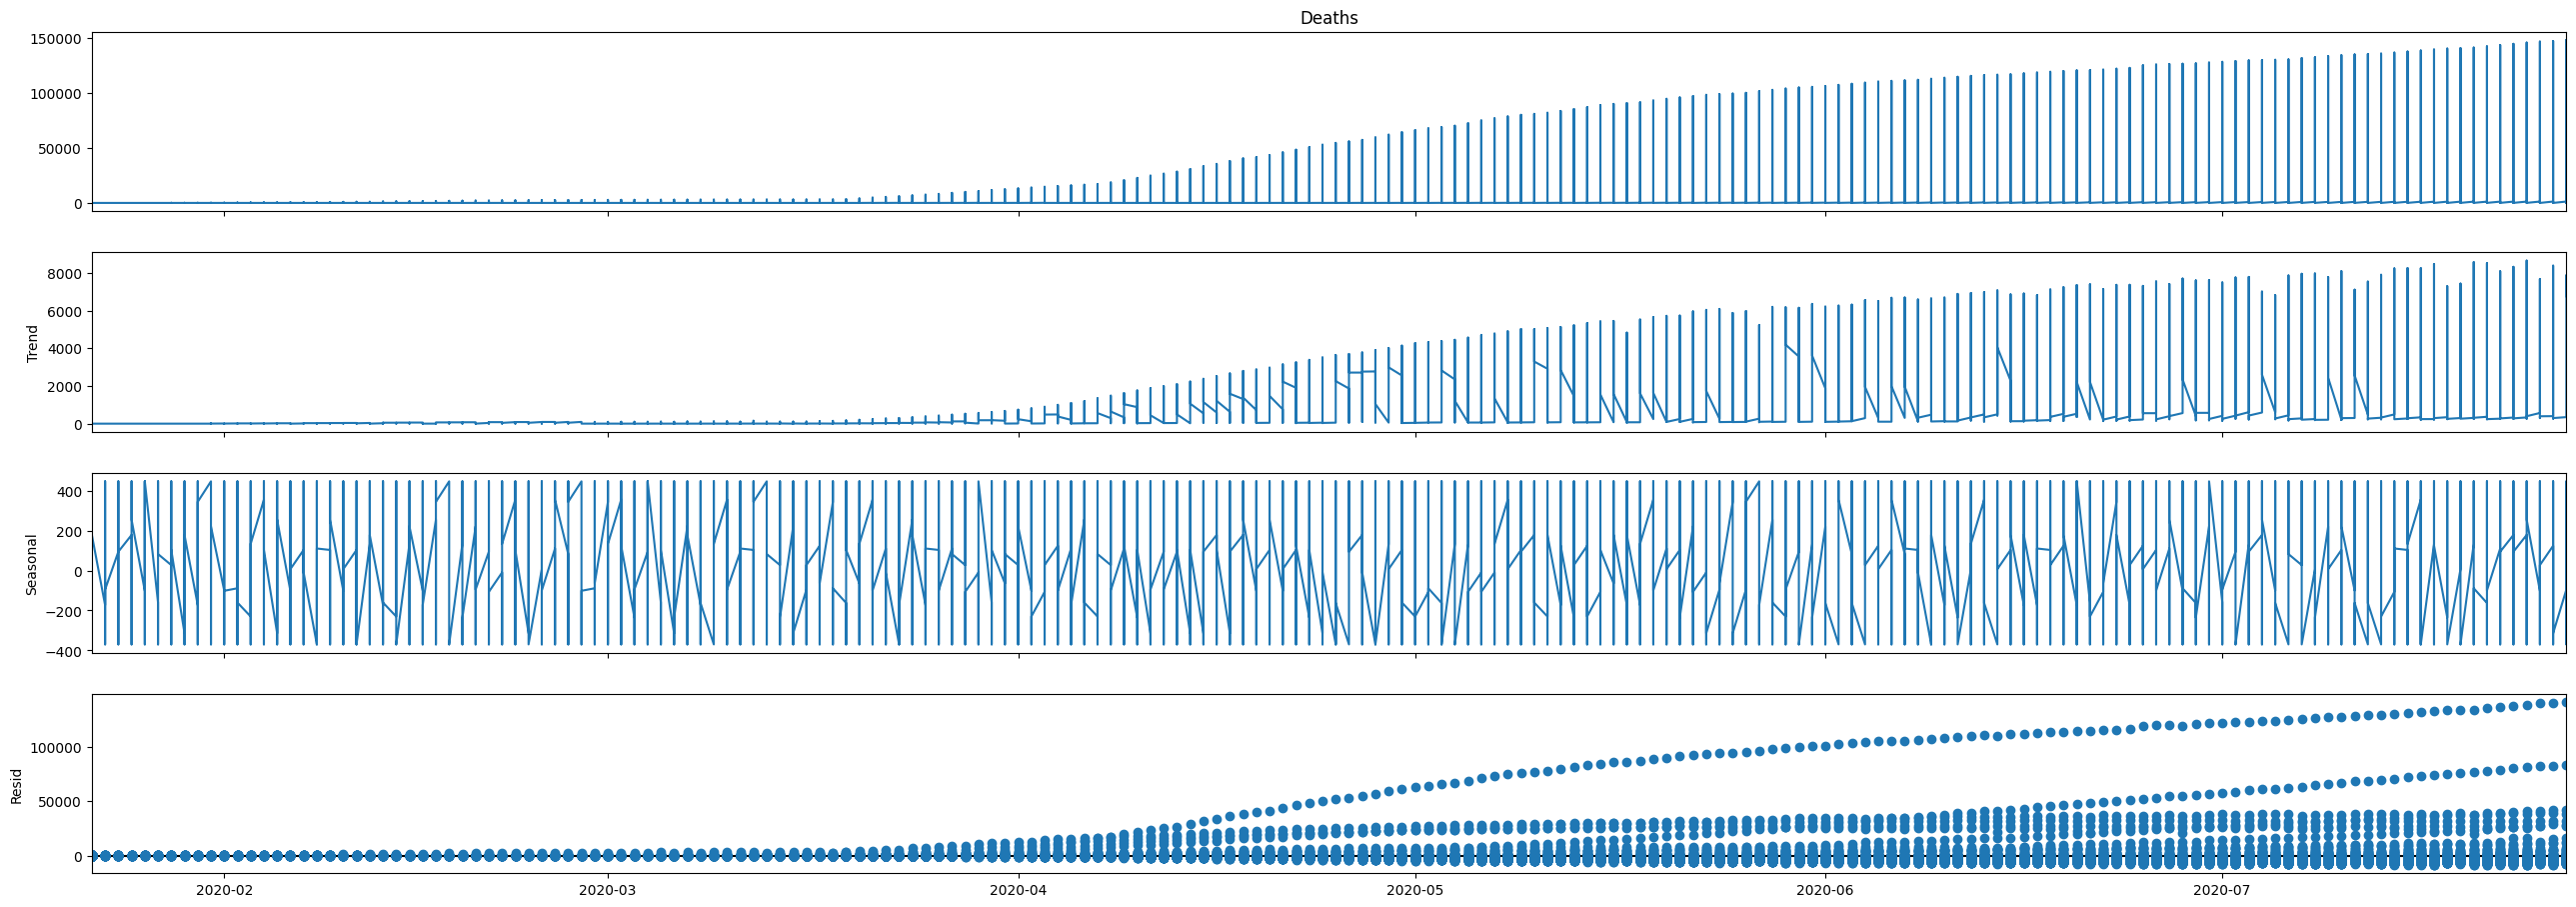

In [ ]:
seasonal_plot('Deaths')

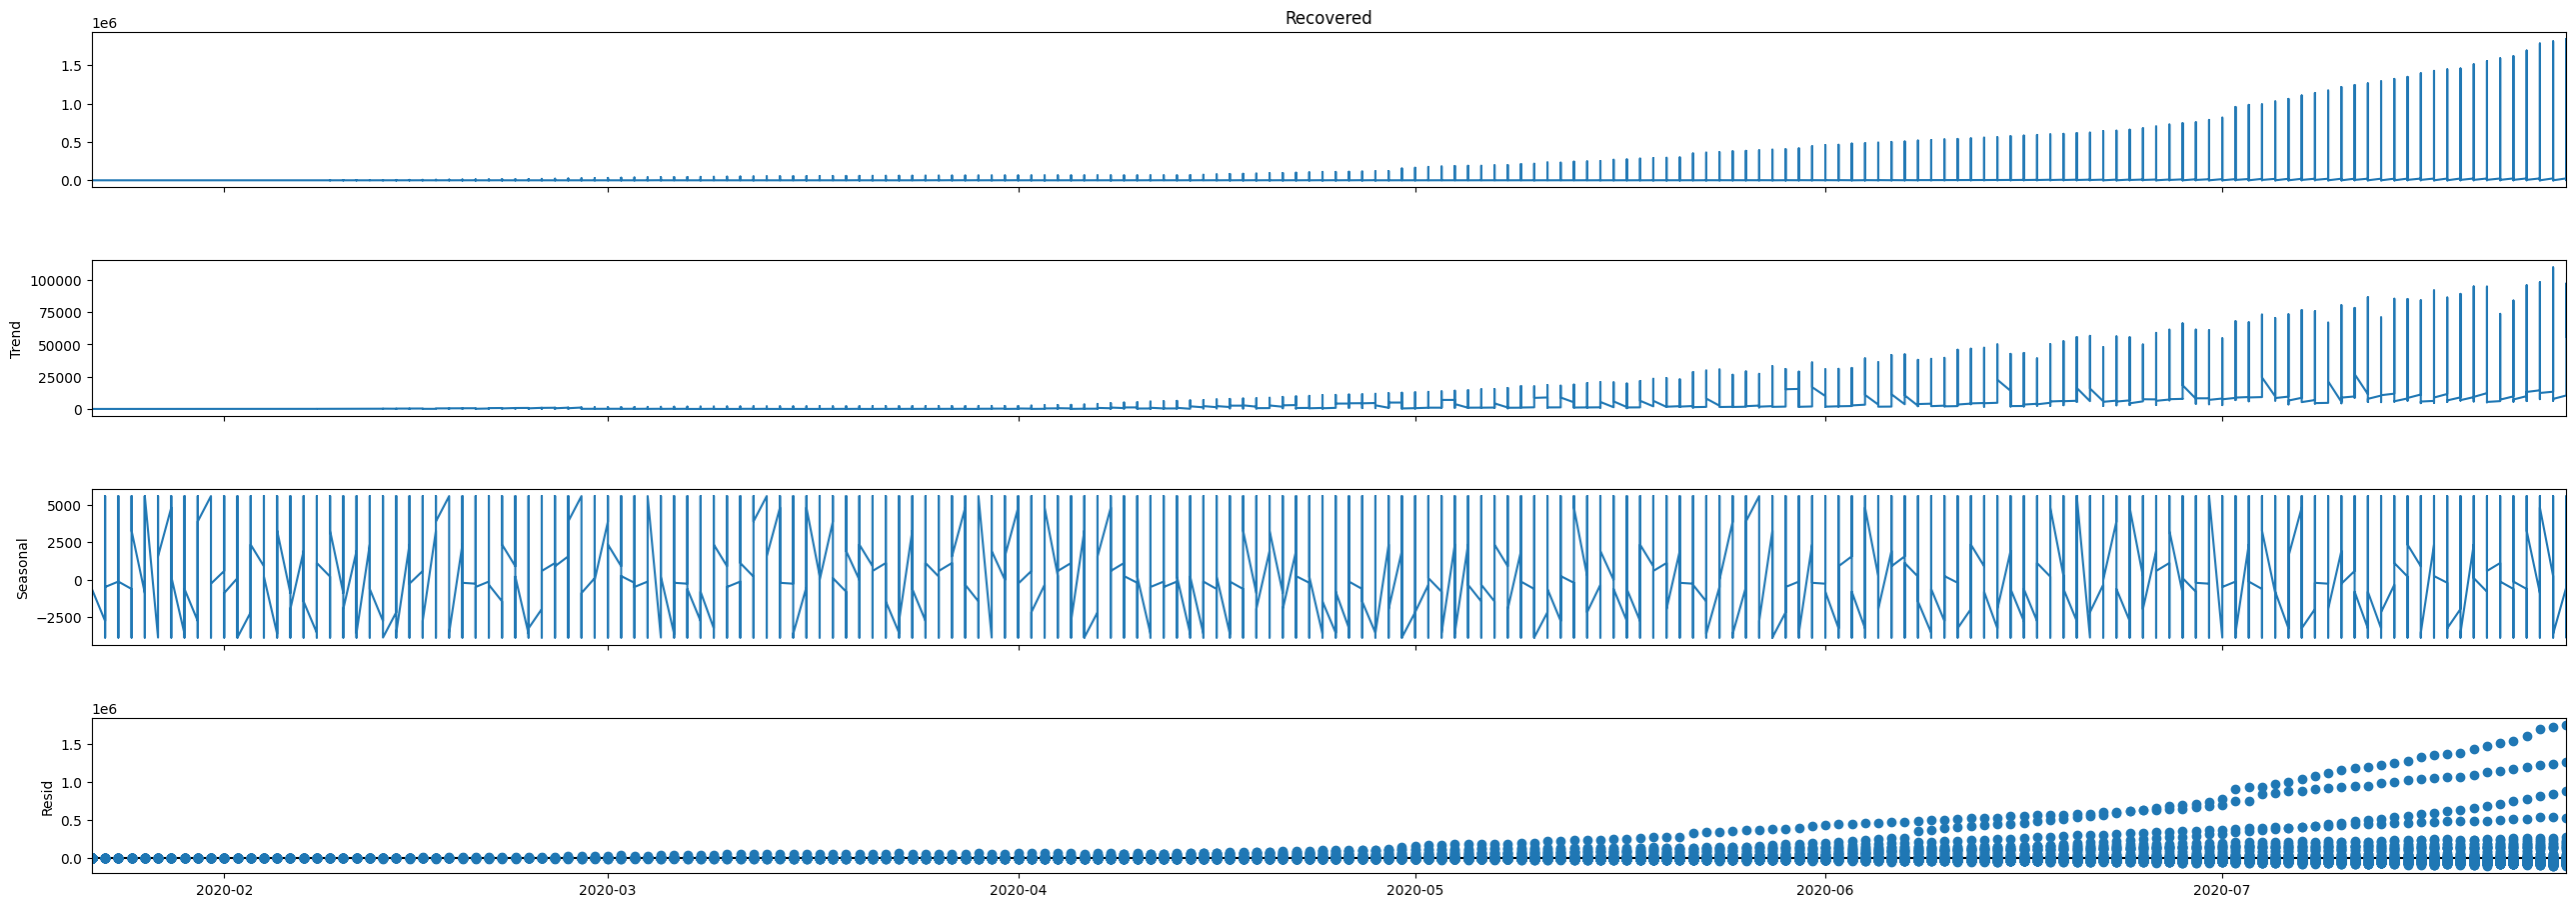

In [ ]:
seasonal_plot('Recovered')

In [ ]:
def stationarity(columns):
    if columns not in ["Confirmed", "Deaths", "Recovered"]:
        print('Column should be "Confirmed", "Deaths", or "Recovered"')
        return

    stat,p_value,_,_,_,_ = adfuller(covid[columns])
    if p_value < 0.05:
        print('Reject Null Hypothesis, is Stationary')
    else:
        print('Accept Null Hypothesis, not stationary')

In [ ]:
stationarity('Confirmed')

Reject Null Hypothesis, is Stationary


In [ ]:
stationarity('Deaths')

Reject Null Hypothesis, is Stationary


In [ ]:
stationarity('Recovered')

Reject Null Hypothesis, is Stationary


In [ ]:
Confirmed = covid.groupby('Date')['Confirmed'].sum()
Deaths = covid.groupby('Date')['Deaths'].sum()
Recovered = covid.groupby('Date')['Recovered'].sum()

In [ ]:
Confirmed

,Confirmed
Date,
2020-01-22,555
2020-01-23,194
2020-01-24,925
2020-01-25,1377
2020-01-26,2100
...,...
2020-07-23,15344255
2020-07-24,15648355
2020-07-25,15121473


In [ ]:
Deaths

,Deaths
Date,
2020-01-22,17
2020-01-23,1
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2020-07-23,626989
2020-07-24,632970
2020-07-25,585027


In [ ]:
Recovered

,Recovered
Date,
2020-01-22,28
2020-01-23,2
2020-01-24,36
2020-01-25,39
2020-01-26,52
...,...
2020-07-23,8576479
2020-07-24,8828961
2020-07-25,8614913


In [ ]:
def prophet_model(df_series):
    df = df_series.reset_index()
    df.columns = ['ds', 'y']

    m = Prophet(interval_width=0.95)
    m.fit(df)
    return m

def prophet_forecast(m, period):
    future = m.make_future_dataframe(periods=period)
    forecast = m.predict(future)
    return forecast

def prophet_plot_forecast(m, forecast):
    fig = m.plot(forecast)
    plt.show()

def prophet_plot_components(m, forecast):
    fig = m.plot_components(forecast)
    plt.show()

In [ ]:
def read_forecast(df,periods):
    print("'df' for Forecast Table")
    print("'plt' for Forecast Plot")
    print("'comp plt' for Forecast Components Plot")
    m = prophet_model(df)
    read= input(': ')
    forecast = prophet_forecast(m,periods)
    if read=='df':
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods))
    elif read=='plt':
        prophet_plot_forecast(m, forecast)
    elif read=='comp plt':
        prophet_plot_components(m, forecast)
    else:
        print('----- ERROR -----')
        print("'df' for Forecast Table")
        print("'plt' for Forecast Plot")
        print("'comp plt' for Forecast Components Plot")

In [ ]:
read_forecast(Confirmed,30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: df
            ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.587995e+07  1.564737e+07  1.609974e+07
189 2020-07-29  1.606769e+07  1.585083e+07  1.630233e+07
190 2020-07-30  1.627649e+07  1.604139e+07  1.650328e+07
191 2020-07-31  1.648251e+07  1.626092e+07  1.670048e+07
192 2020-08-01  1.661658e+07  1.639768e+07  1.686831e+07
193 2020-08-02  1.678387e+07  1.654617e+07  1.701003e+07
194 2020-08-03  1.705615e+07  1.681427e+07  1.728851e+07
195 2020-08-04  1.724299e+07  1.698467e+07  1.750507e+07
196 2020-08-05  1.743073e+07  1.717753e+07  1.769475e+07
197 2020-08-06  1.763954e+07  1.738889e+07  1.789221e+07
198 2020-08-07  1.784555e+07  1.758855e+07  1.812692e+07
199 2020-08-08  1.797963e+07  1.769953e+07  1.827056e+07
200 2020-08-09  1.814692e+07  1.785233e+07  1.842487e+07
201 2020-08-10  1.841919e+07  1.810298e+07  1.874444e+07
202 2020-08-11  1.860604e+07  1.826900e+07  1.893345

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: plt


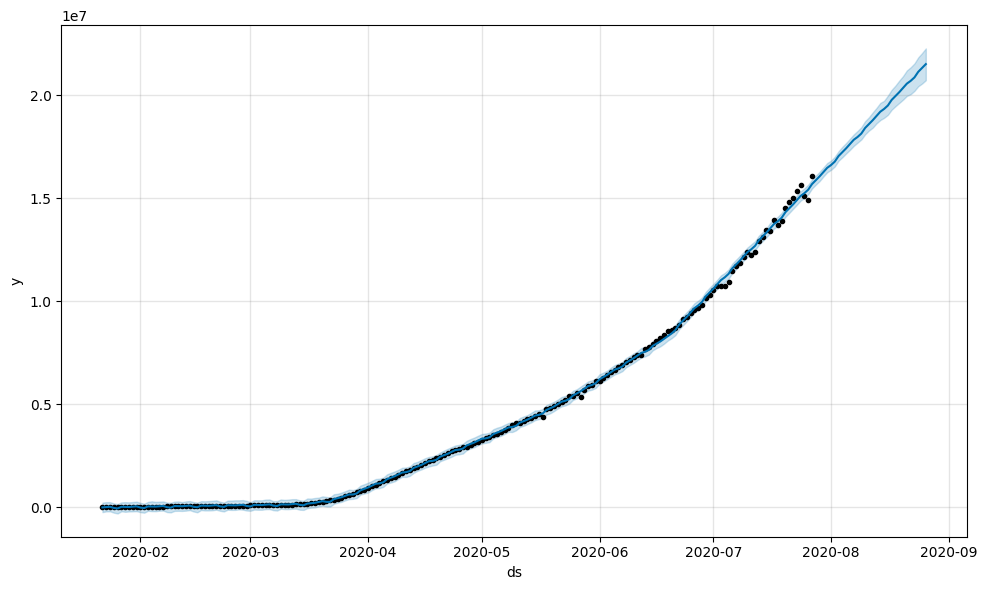

In [ ]:
read_forecast(Confirmed,30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: comp plt


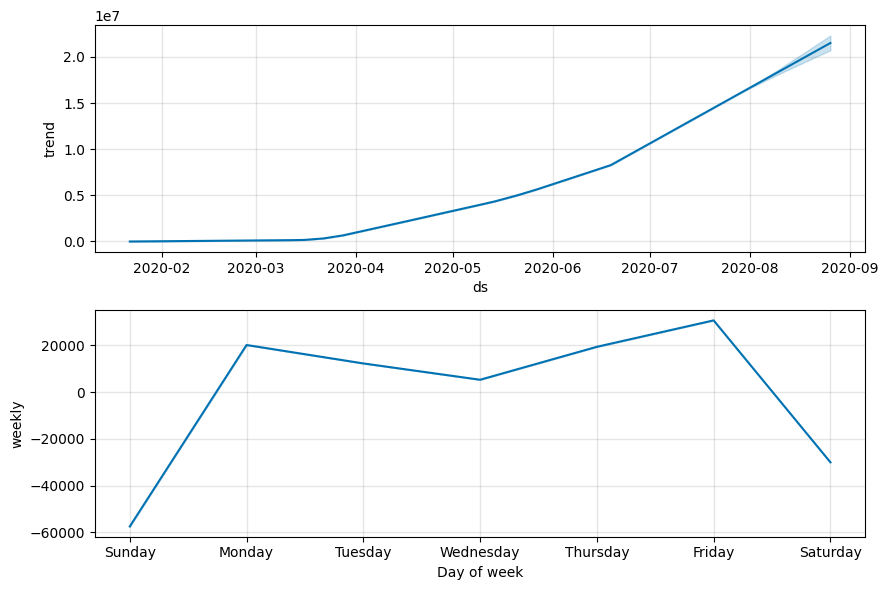

In [ ]:
read_forecast(Confirmed,30)

In [ ]:
read_forecast(Deaths,30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: df
            ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  622926.471978  607373.118660  638105.910475
189 2020-07-29  626552.929746  610385.813333  640447.154172
190 2020-07-30  632612.955572  617518.125274  649088.865954
191 2020-07-31  637566.102596  622809.653553  652798.077216
192 2020-08-01  635766.998629  620554.447378  651445.790028
193 2020-08-02  636856.434090  620899.267068  652241.098598
194 2020-08-03  647651.207119  631895.755453  663017.837051
195 2020-08-04  653350.179335  637038.766617  668821.280728
196 2020-08-05  656976.637103  641288.546124  673769.853942
197 2020-08-06  663036.662929  647463.293968  679673.440805
198 2020-08-07  667989.809953  651152.865367  685993.338203
199 2020-08-08  666190.705986  647854.565748  683384.631946
200 2020-08-09  667280.141447  649722.528269  686163.128546
201 2020-08-10  678074.914476  657219.837939  697129.201450
202 202

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: plt


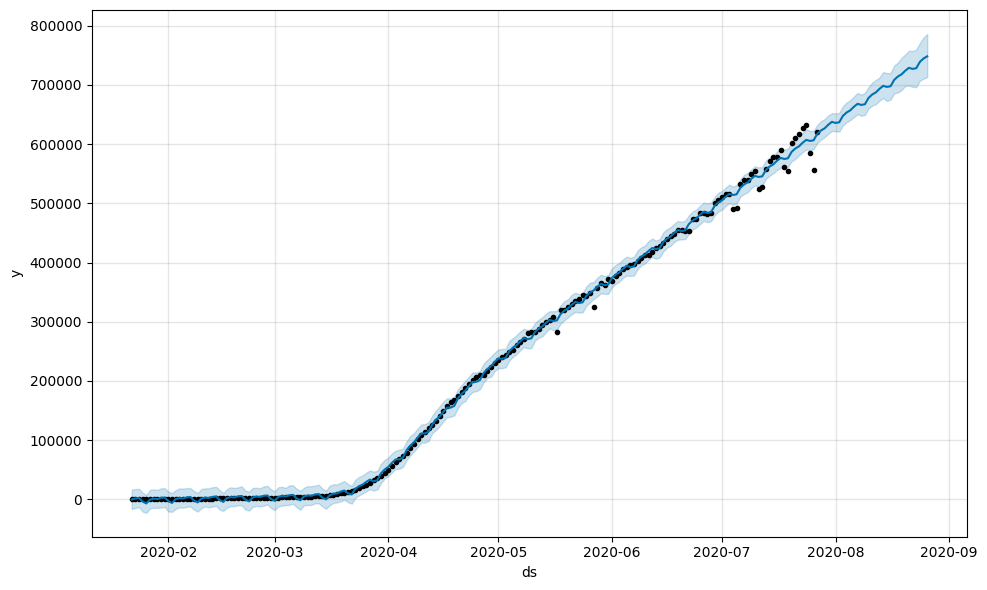

In [ ]:
read_forecast(Deaths,30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: comp plt


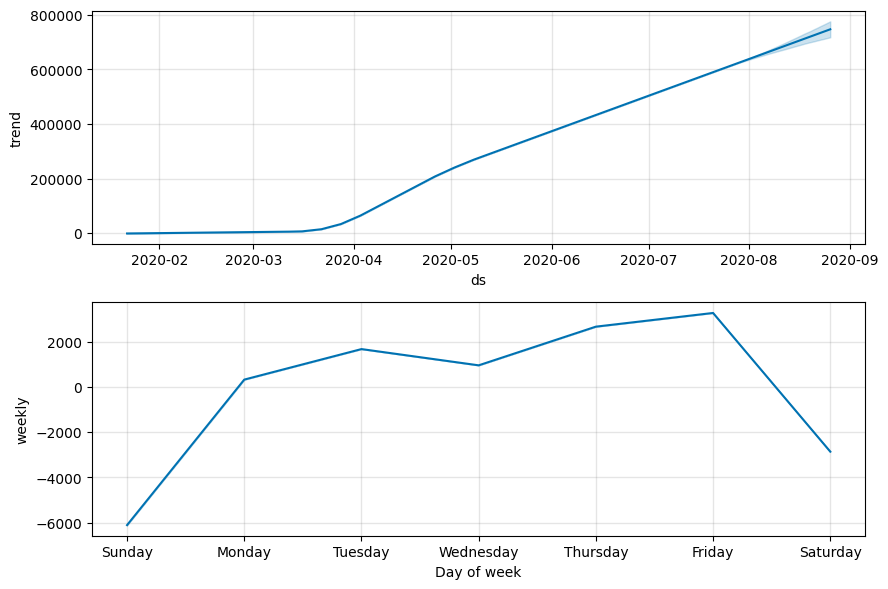

In [ ]:
read_forecast(Deaths,30)

In [ ]:
read_forecast(Recovered,30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: df
            ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  9.042684e+06  8.897288e+06  9.177597e+06
189 2020-07-29  9.170683e+06  9.033426e+06  9.302794e+06
190 2020-07-30  9.309815e+06  9.179037e+06  9.441320e+06
191 2020-07-31  9.450942e+06  9.305758e+06  9.583207e+06
192 2020-08-01  9.553932e+06  9.409750e+06  9.693149e+06
193 2020-08-02  9.668359e+06  9.520438e+06  9.809176e+06
194 2020-08-03  9.836347e+06  9.689187e+06  9.974806e+06
195 2020-08-04  9.962549e+06  9.802288e+06  1.011717e+07
196 2020-08-05  1.009055e+07  9.934988e+06  1.024859e+07
197 2020-08-06  1.022968e+07  1.005190e+07  1.040853e+07
198 2020-08-07  1.037081e+07  1.019052e+07  1.055472e+07
199 2020-08-08  1.047380e+07  1.028011e+07  1.067111e+07
200 2020-08-09  1.058822e+07  1.038117e+07  1.080495e+07
201 2020-08-10  1.075621e+07  1.052854e+07  1.098286e+07
202 2020-08-11  1.088241e+07  1.064162e+07  1.112769

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: plt


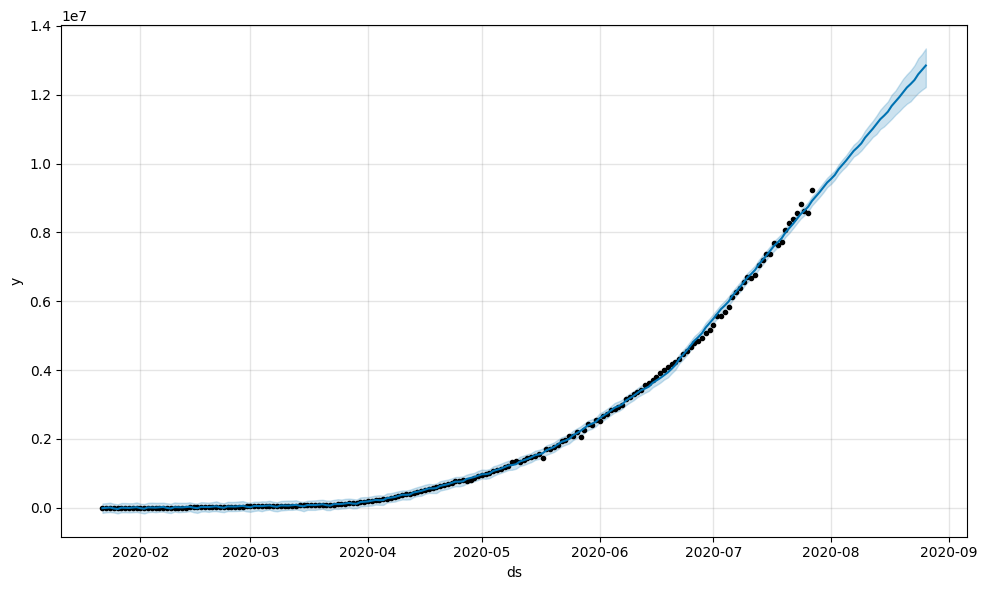

In [ ]:
read_forecast(Recovered,30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'df' for Forecast Table
'plt' for Forecast Plot
'comp plt' for Forecast Components Plot
: comp plt


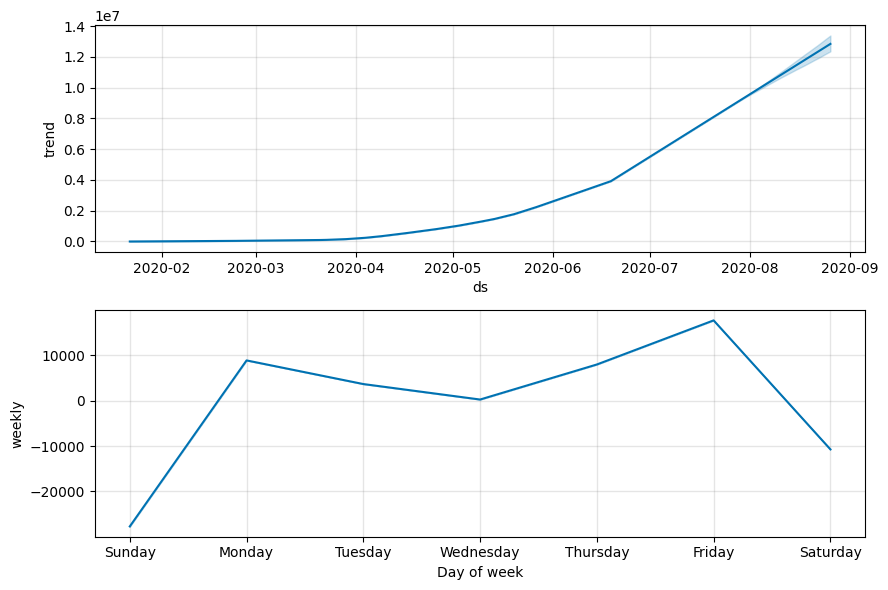

In [ ]:

read_forecast(Recovered,30)